 https://archive.ics.uci.edu/dataset/186/wine+quality

## Import Libraries



In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import math
import scipy.stats as st
%matplotlib inline

## Get the Data

In [280]:
df = pd.read_csv("wine+quality/winequality-red.csv", delimiter=';')

In [163]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [202]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# Exploratory Data Analysis


## Missing Data

<AxesSubplot:>

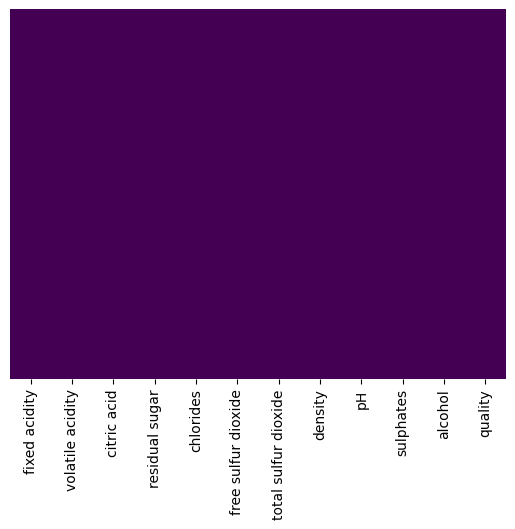

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

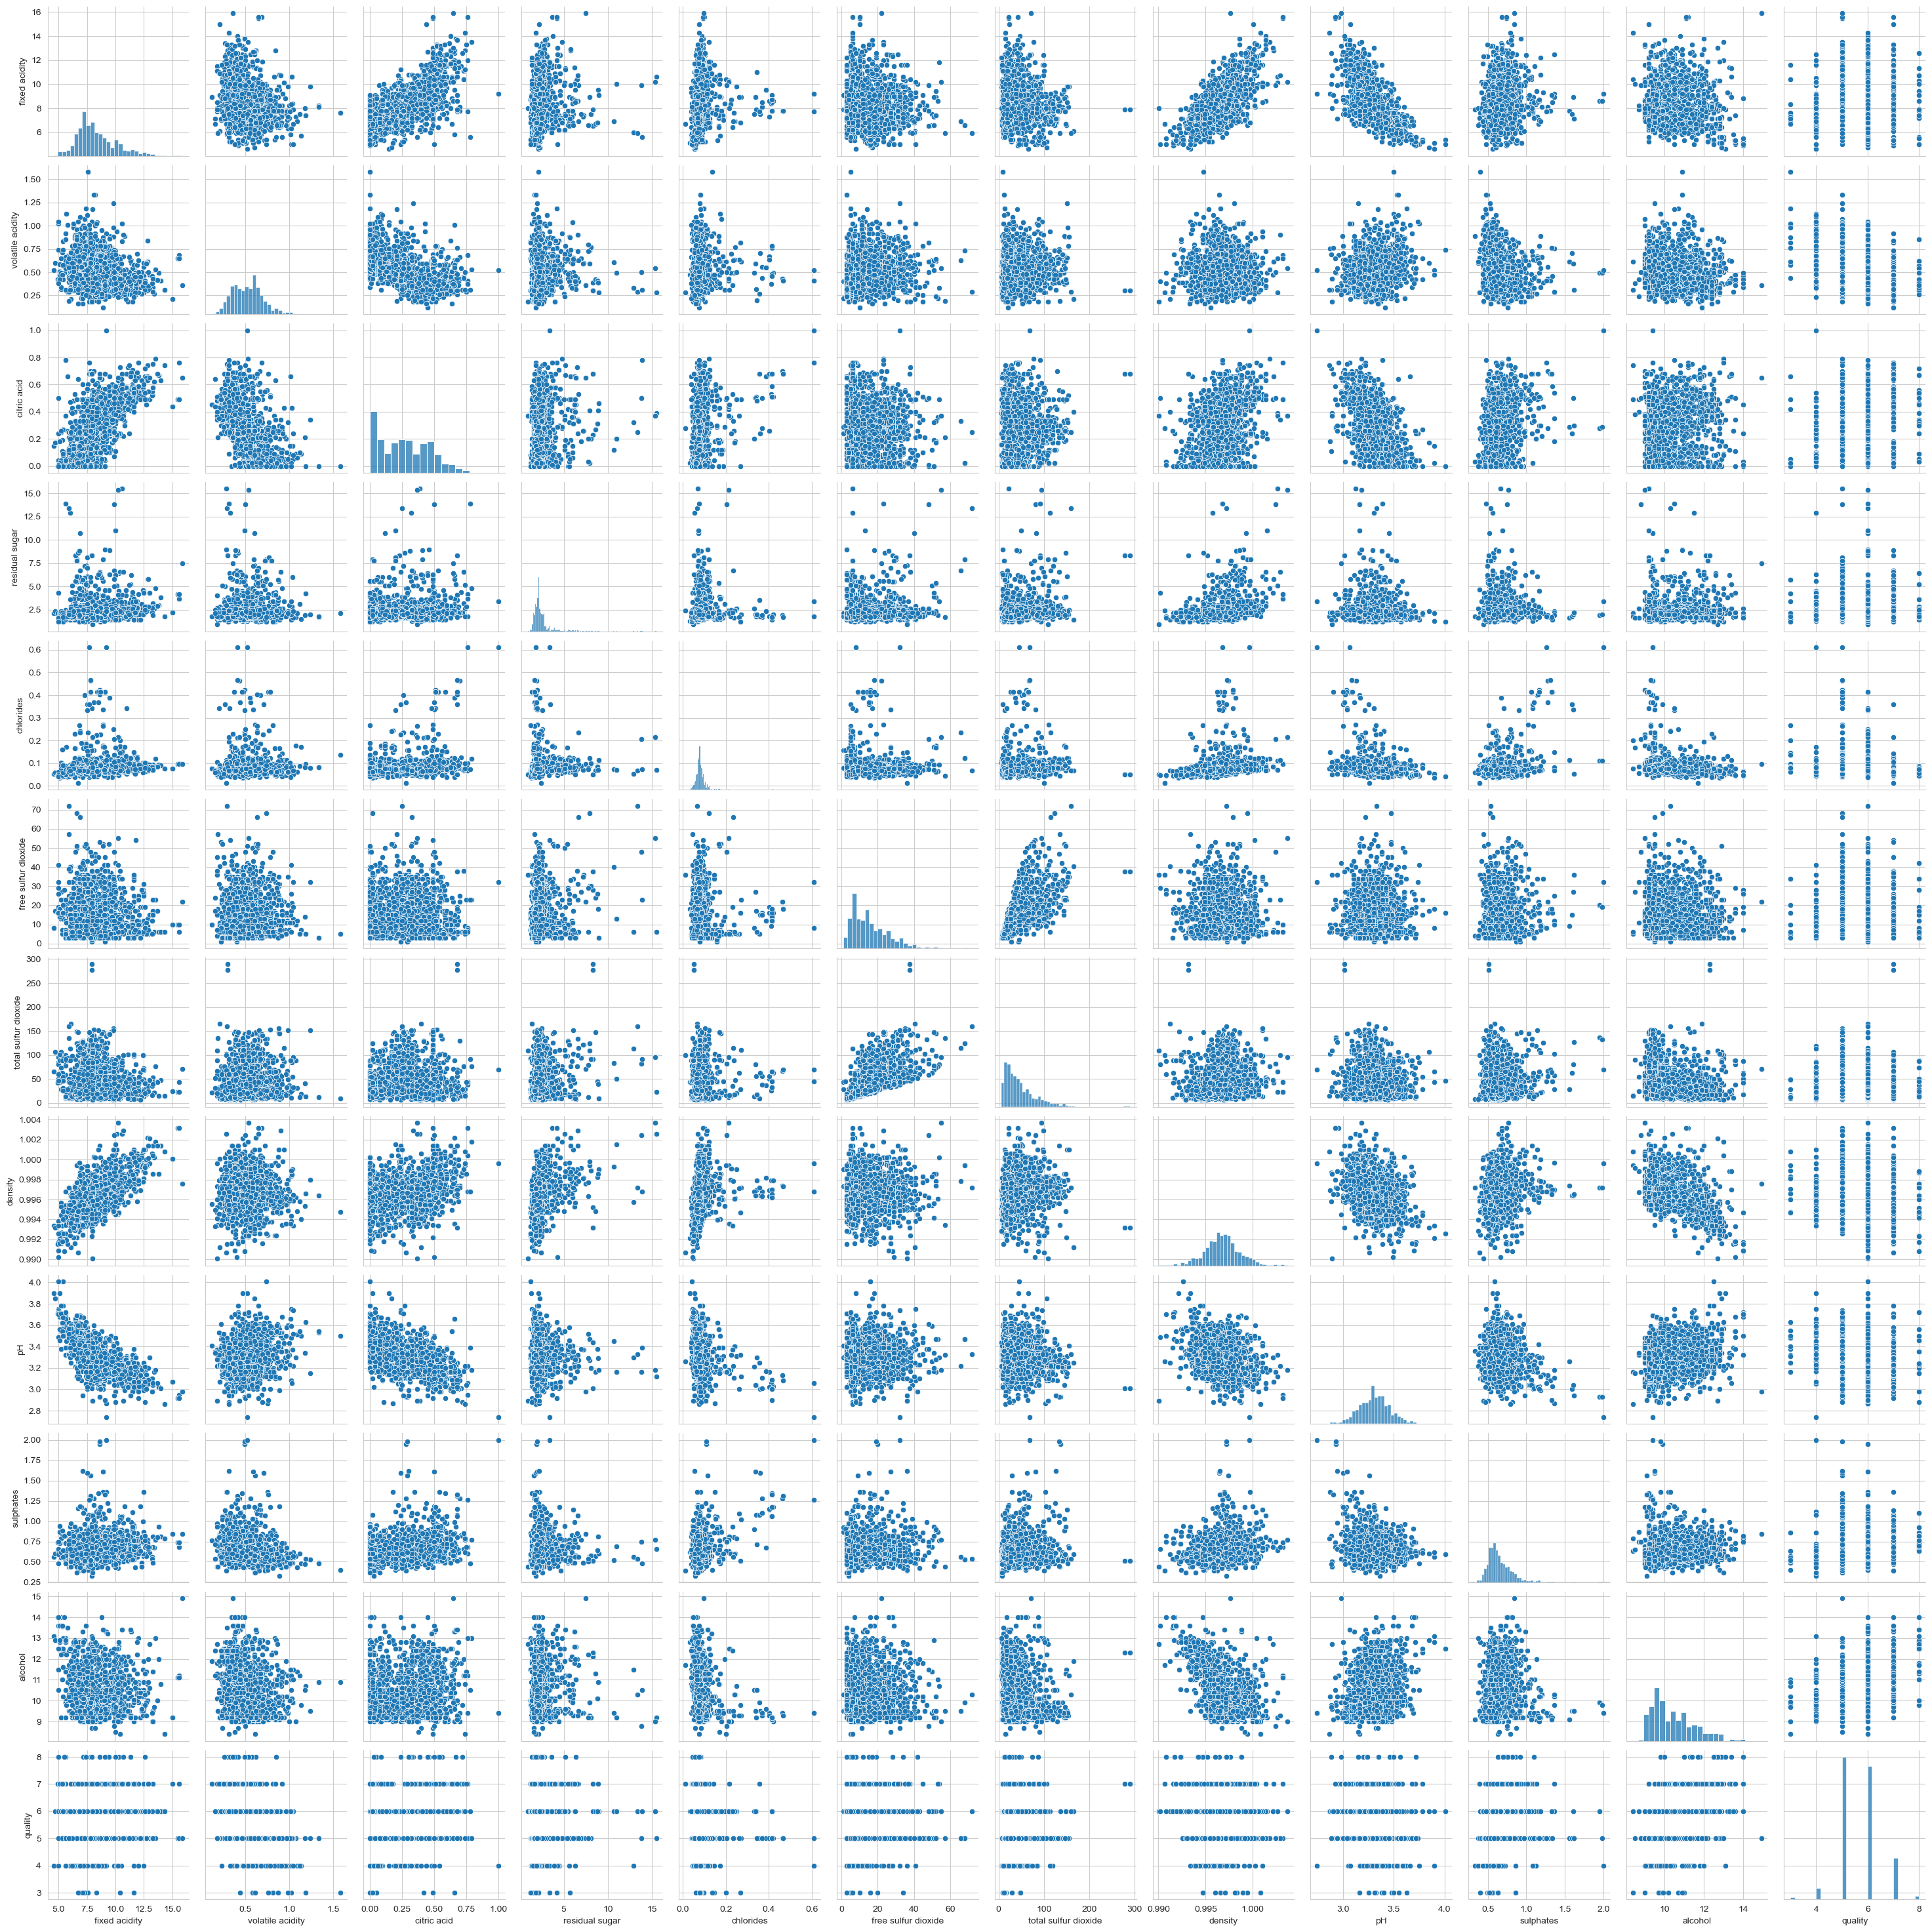

In [37]:
sns.pairplot(df)

<AxesSubplot:xlabel='fixed acidity', ylabel='count'>

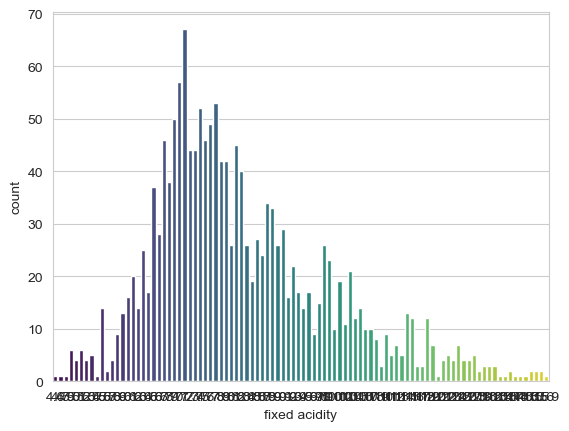

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='fixed acidity',data=df,palette='viridis')

In [10]:
skewness = df.skew()
kurtosis = df.kurtosis()
result_df = pd.DataFrame({
    'Коэффициент асимметрии': skewness,
    'Эксцесс': kurtosis
})
result_df

Коэффициент асимметрии    Эксцесс
fixed acidity                       0.982751   1.132143
volatile acidity                    0.671593   1.225542
citric acid                         0.318337  -0.788998
residual sugar                      4.540655  28.617595
chlorides                           5.680347  41.715787
free sulfur dioxide                 1.250567   2.023562
total sulfur dioxide                1.515531   3.809824
density                             0.071288   0.934079
pH                                  0.193683   0.806943
sulphates                           2.428672  11.720251
alcohol                             0.860829   0.200029
quality                             0.217802   0.296708

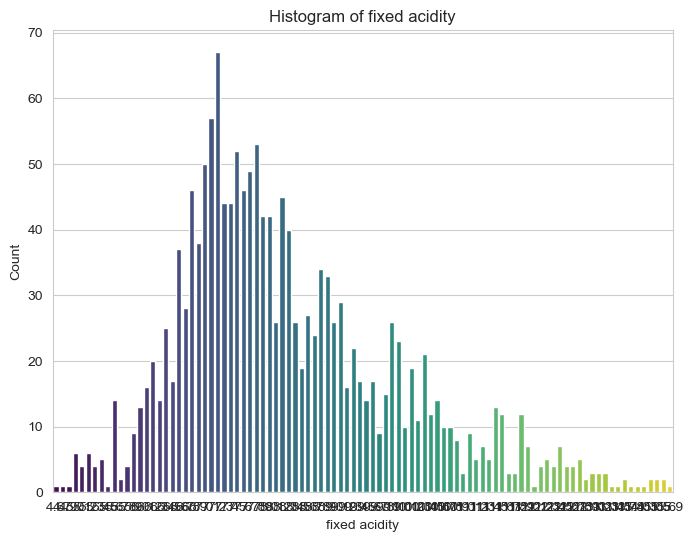

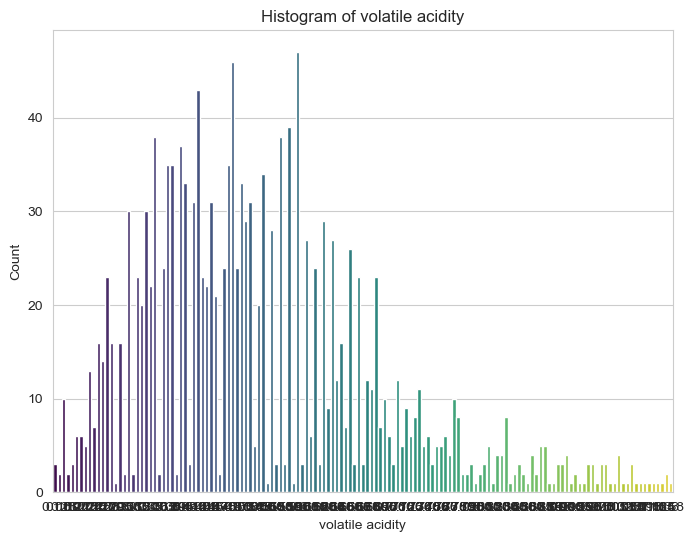

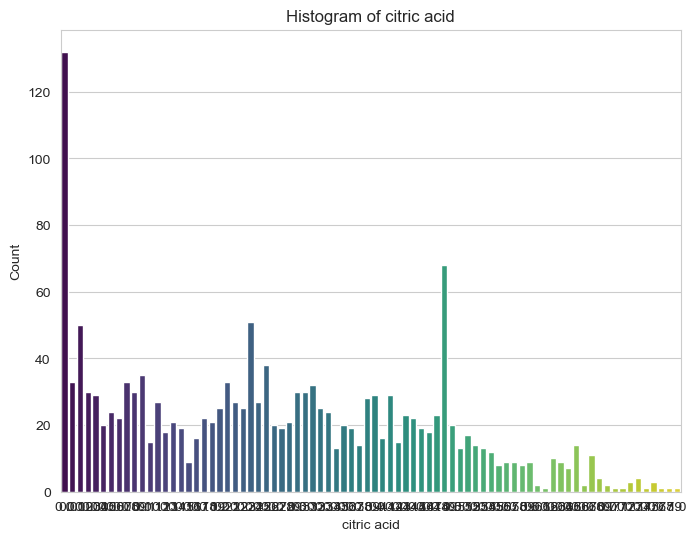

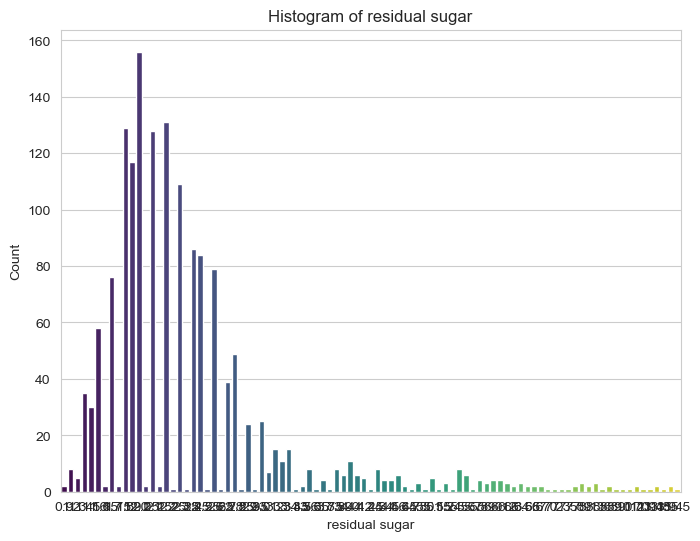

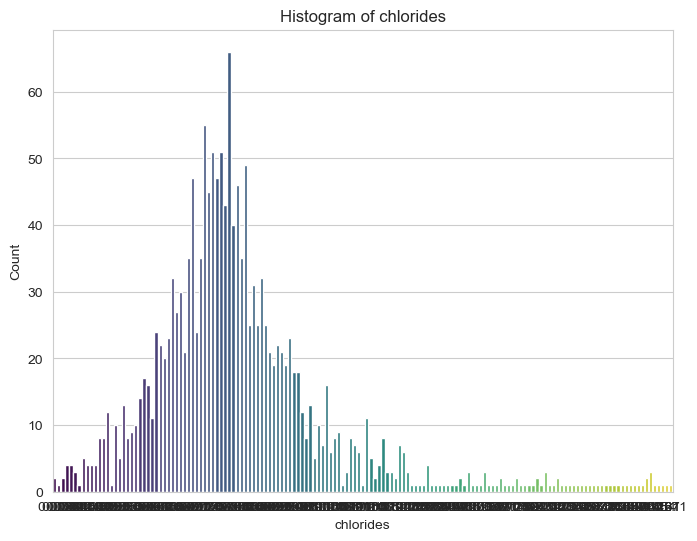

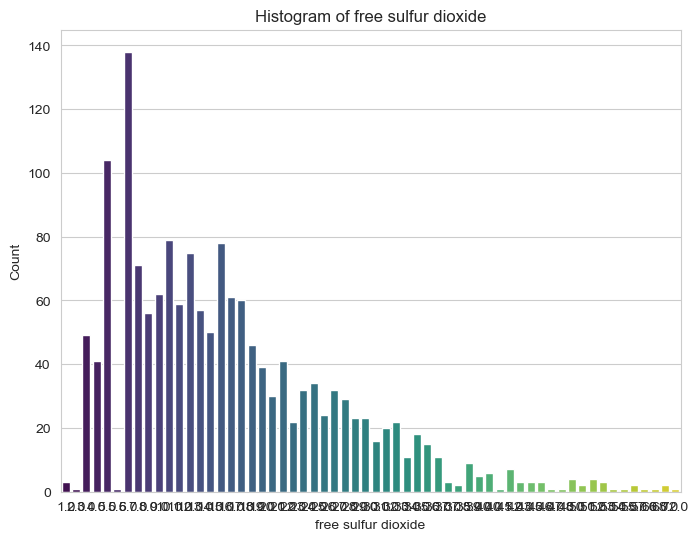

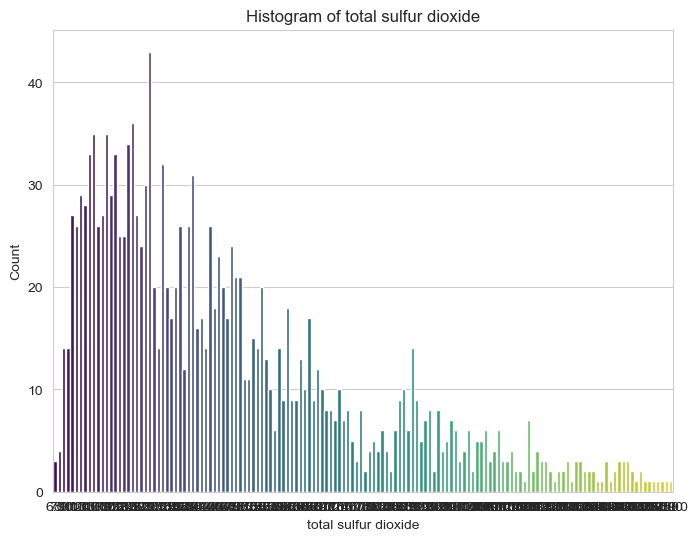

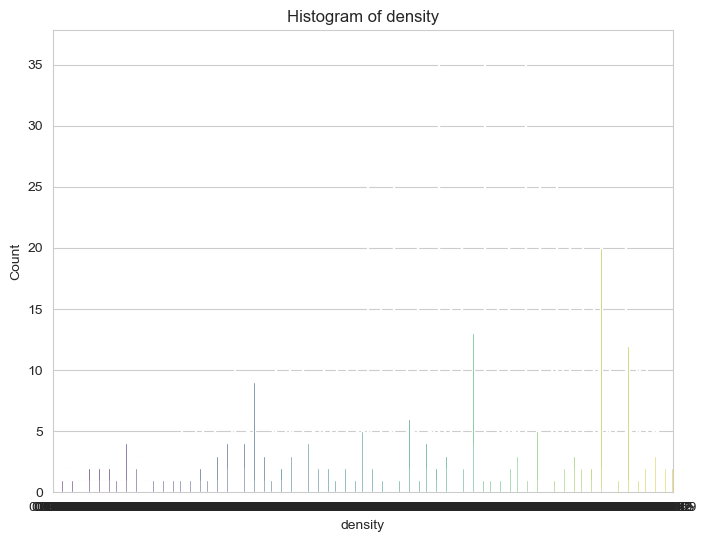

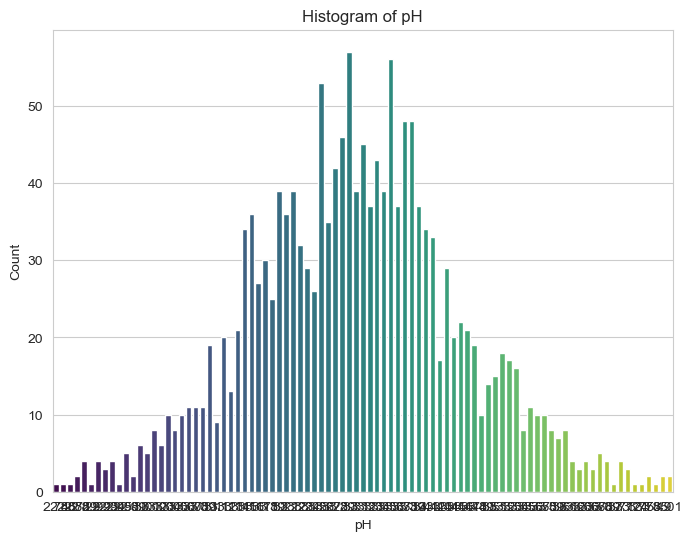

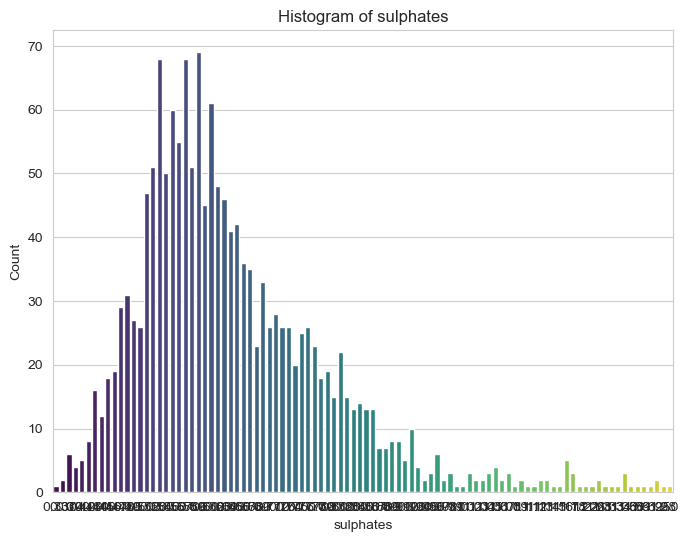

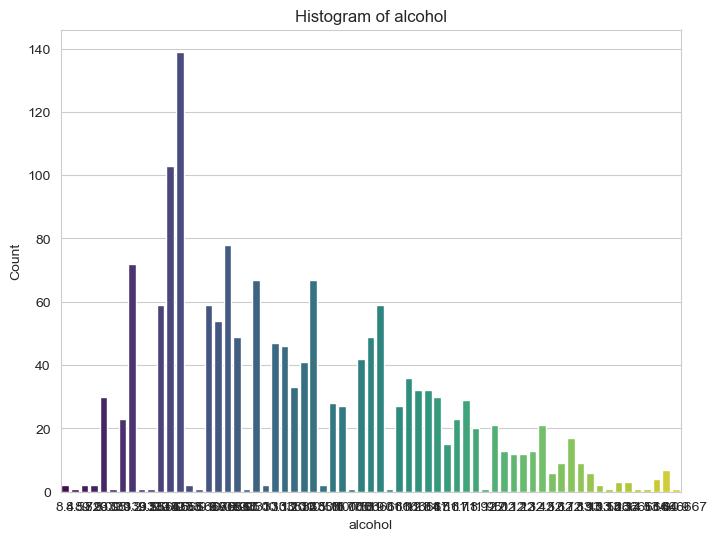

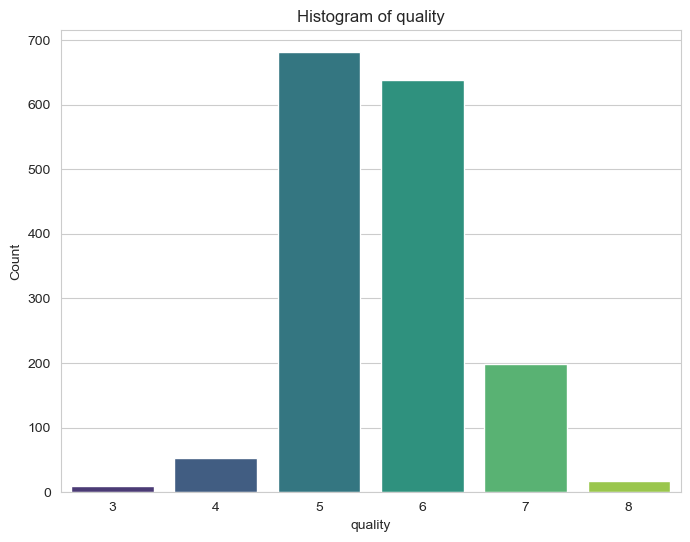

In [11]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.set_style('whitegrid')
    sns.countplot(x=df[column],palette='viridis')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

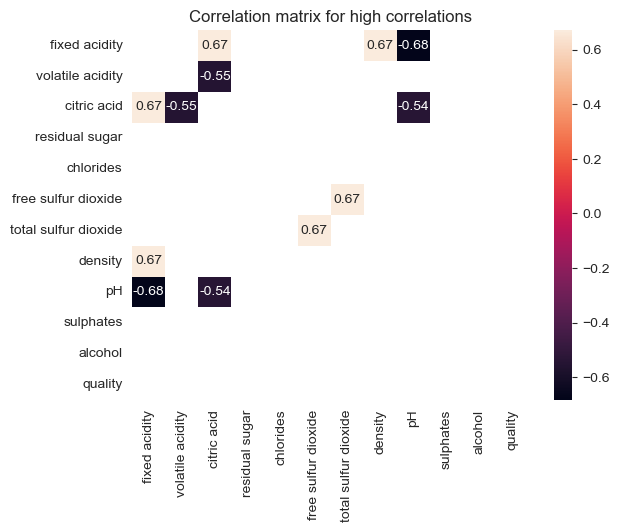

In [144]:
correlation_matr = df.corr(method='pearson')
high_corr_matrix = correlation_matr[(correlation_matr.abs() > 0.5) & (correlation_matr.abs() != 1.0)]
sns.heatmap(high_corr_matrix, annot=True)
plt.title('Correlation matrix for high correlations')
plt.show()

### Outlier analysis

In [165]:
def my_norm_confidence(df, column, alpha):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [166]:
for i in df.columns:
    confidence = my_norm_confidence(df, i, 0.95)
    print(confidence)

(4.907151196150252, 11.732123350441423)
(0.17686994159718744, 0.8787710840438387)
(-0.11082760370576494, 0.6527788232179578)
(-0.2246027139870641, 5.3022137208663676)
(-0.00477975527278475, 0.17971283844976987)
(-4.626609107321357, 36.376452759604035)
(-18.005858866993506, 110.94144360745629)
(0.9930475725981521, 1.000445785750814)
(3.0085212848359424, 3.6137051066587436)
(0.32592126790211096, 0.9903764181516733)
(8.334313034533722, 12.511653194359283)
(4.0532154971760885, 7.2188295309665005)


## Delete outliers

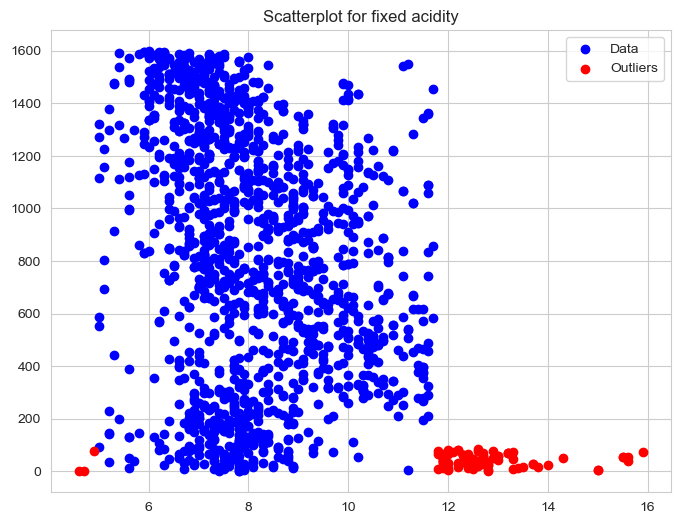

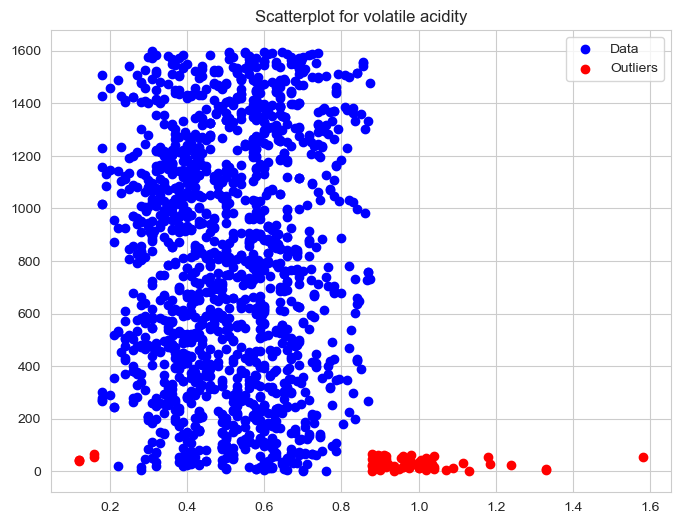

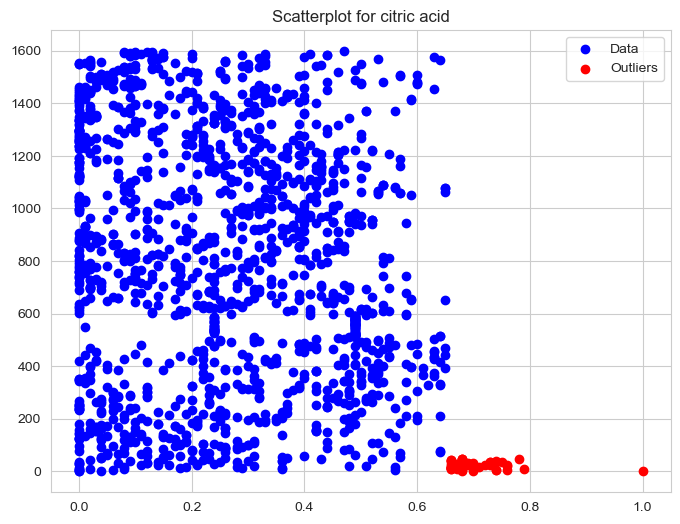

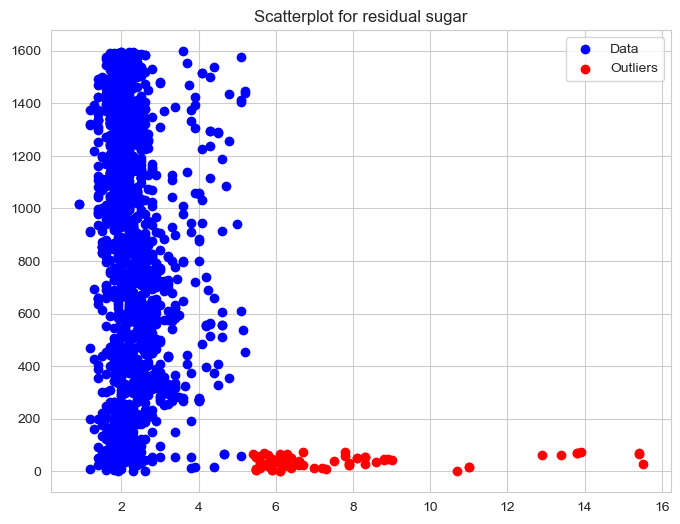

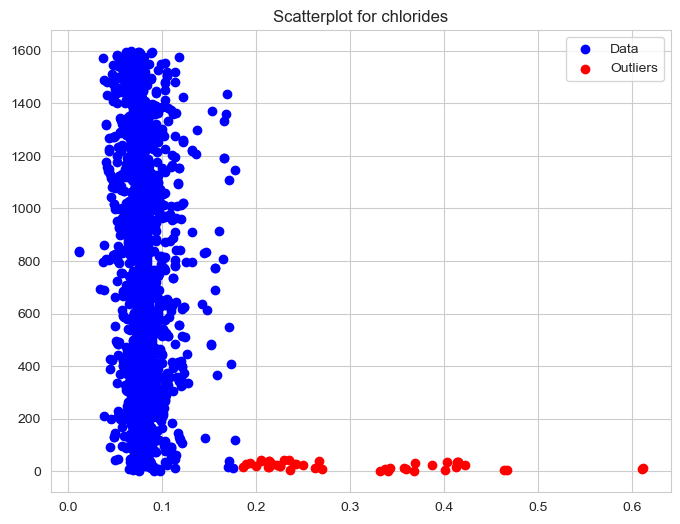

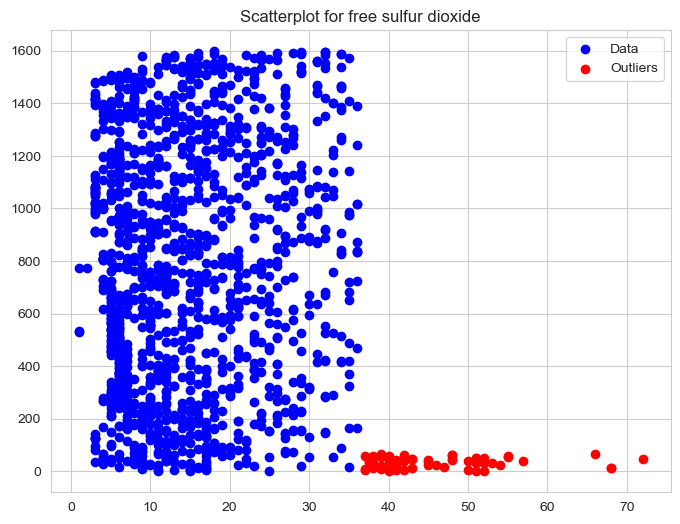

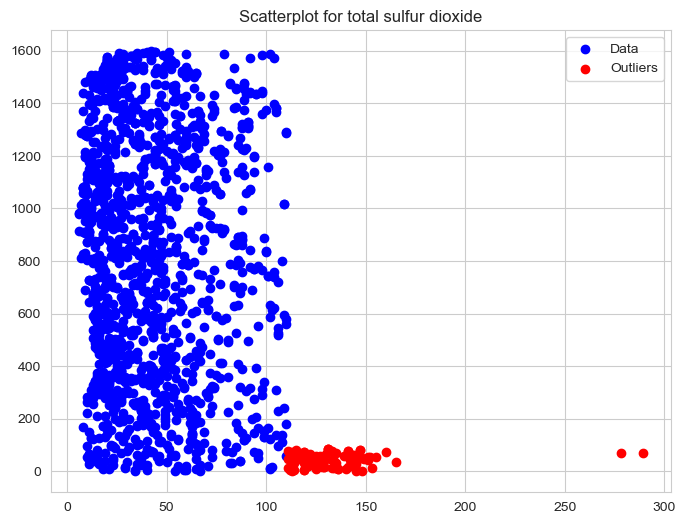

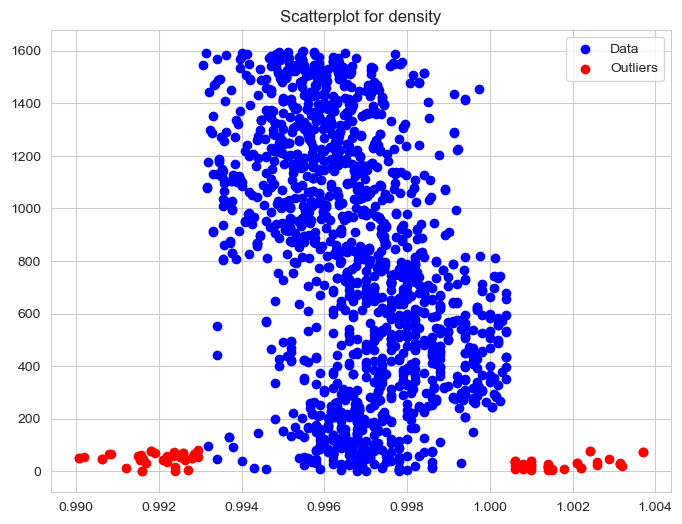

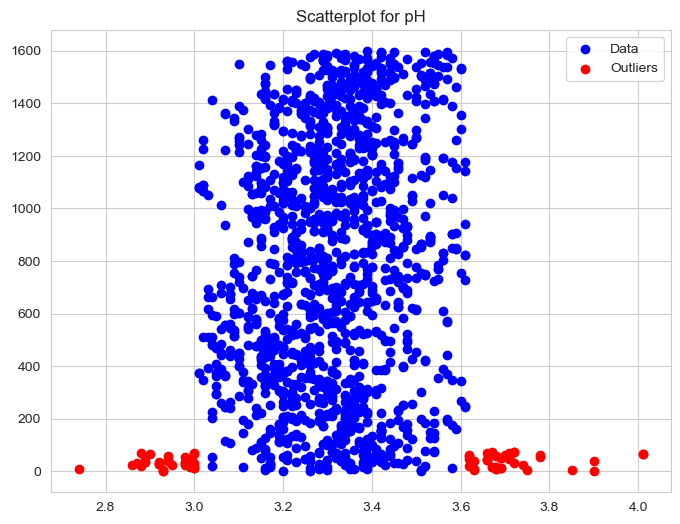

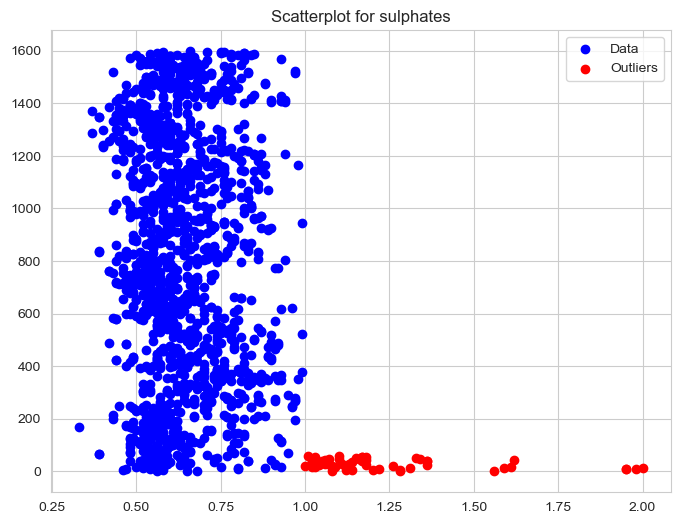

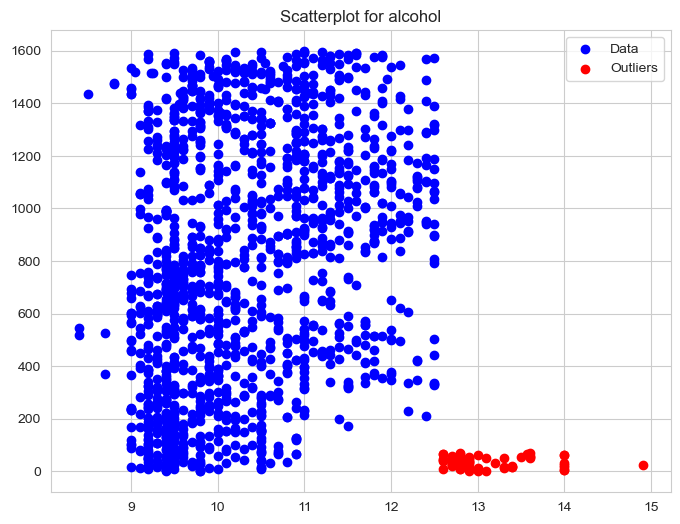

Outliers count for fixed acidity : 84
Outliers count for volatile acidity : 66
Outliers count for citric acid : 49
Outliers count for residual sugar : 75
Outliers count for chlorides : 45
Outliers count for free sulfur dioxide : 66
Outliers count for total sulfur dioxide : 86
Outliers count for density : 81
Outliers count for pH : 75
Outliers count for sulphates : 59
Outliers count for alcohol : 70


In [281]:
#how many outliers
df_cleaned = df.copy()
outliers_count = {}

for column in df.columns:
    if column == "quality":
        continue
    lower_bound = df[column].mean() - 1.96 * df[column].std()
    upper_bound = df[column].mean() + 1.96 * df[column].std()
    
    #Clean dataframe
    df_cleaned[column] = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    outliers_count[column] = df[column].count() - df_cleaned[column].count()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(df_cleaned[column], range(len(df_cleaned[column])), color='blue', label='Data')
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    plt.scatter(outliers[column], range(len(outliers)), color='red', label='Outliers')
    plt.title('Scatterplot for ' + column)
    plt.legend()
    plt.show()

for column, count in outliers_count.items():
    print("Outliers count for", column, ":", count)

## Multiclass -> binary

In [283]:
df_cleaned['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [284]:
class_mapping = {3: 'low', 4: 'low', 5: 'low', 6: 'high', 7: 'high', 8: 'high'}

df_cleaned['quality'] = df_cleaned['quality'].map(class_mapping)


In [286]:
df_cleaned['quality'].value_counts()

high    855
low     744
Name: quality, dtype: int64

In [242]:
# import pandas as pd

# desired_copies = {
#     7: 350,  
#     4: 630,  
#     8: 660,    
#     3: 670   
# }

# df_duplicates = pd.DataFrame()

# for cls, num_copies in desired_copies.items():
#     rows = df_cleaned[df_cleaned['quality'] == cls]
#     duplicated_rows = rows.sample(n=num_copies, replace=True)
#     df_duplicates = pd.concat([df_duplicates, duplicated_rows])

# df_augmented = pd.concat([df_cleaned, df_duplicates])

# df_augmented['quality'].value_counts()
# df_cleaned = df_augmented

In [147]:
# classes_to_drop = [4, 8, 3,7]
# df = df[~df['quality'].isin(classes_to_drop)]
# df = df.dropna(subset=['quality'])

In [250]:
#df['quality'] = np.log(df['quality'])
# sns.boxplot(df_cleaned['quality'])

## Standardize the Variables

In [287]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1515 non-null   float64
 1   volatile acidity      1533 non-null   float64
 2   citric acid           1550 non-null   float64
 3   residual sugar        1524 non-null   float64
 4   chlorides             1554 non-null   float64
 5   free sulfur dioxide   1533 non-null   float64
 6   total sulfur dioxide  1513 non-null   float64
 7   density               1518 non-null   float64
 8   pH                    1524 non-null   float64
 9   sulphates             1540 non-null   float64
 10  alcohol               1529 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [288]:
from sklearn.preprocessing import StandardScaler

df_cleaned = df_cleaned.dropna()
X = df_cleaned.drop('quality', axis=1)
y = df_cleaned['quality']
scaler = StandardScaler(with_std=False, with_mean=False)
X_scaled = scaler.fit_transform(X)

## Train Test Split

In [289]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

In [290]:
X_scaled

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       [11.2  ,  0.28 ,  0.56 , ...,  3.16 ,  0.58 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [291]:
df_cleaned['quality'].value_counts()

high    608
low     498
Name: quality, dtype: int64


# Building a Logistic Regression model


In [394]:
from sklearn.linear_model import LogisticRegression

# class_weights = {
#     5: 1,
#     6: 1
# }

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [421]:
log_predictions = logmodel.predict(X_test)

## Predictions and Evaluations

In [396]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [295]:
confusion_matrix(y_test,predictions)

array([[135,  47],
       [ 46, 104]])

In [296]:
y_train.value_counts()

high    426
low     348
Name: quality, dtype: int64

In [297]:
y_test.value_counts()

high    182
low     150
Name: quality, dtype: int64

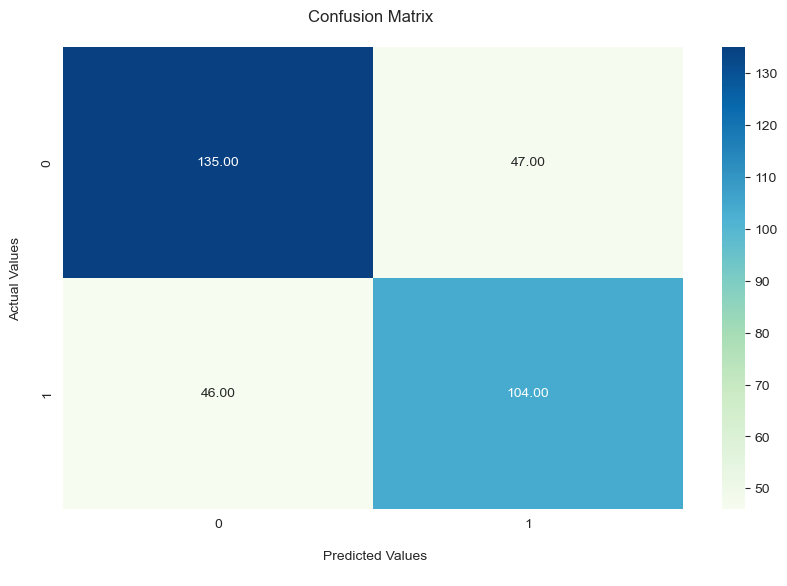

In [298]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [299]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        high       0.75      0.74      0.74       182
         low       0.69      0.69      0.69       150

    accuracy                           0.72       332
   macro avg       0.72      0.72      0.72       332
weighted avg       0.72      0.72      0.72       332



In [422]:
report_log = classification_report(y_test, log_predictions, output_dict=True)
log_report = pd.DataFrame(report_log).transpose()
log_report

precision    recall  f1-score    support
high           0.745856  0.741758  0.743802  182.00000
low            0.688742  0.693333  0.691030  150.00000
accuracy       0.719880  0.719880  0.719880    0.71988
macro avg      0.717299  0.717546  0.717416  332.00000
weighted avg   0.720052  0.719880  0.719959  332.00000

# Building a KNN model

In [415]:
from sklearn.neighbors import KNeighborsClassifier

In [416]:
knn = KNeighborsClassifier(n_neighbors=1)

In [417]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [418]:
knn_pred = knn.predict(X_test)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Predictions and Evaluations

In [419]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[126  56]
 [ 59  91]]


              precision    recall  f1-score   support

        high       0.68      0.69      0.69       182
         low       0.62      0.61      0.61       150

    accuracy                           0.65       332
   macro avg       0.65      0.65      0.65       332
weighted avg       0.65      0.65      0.65       332



In [420]:
report_knn = classification_report(y_test, knn_pred, output_dict=True)
knn_report = pd.DataFrame(report_knn).transpose()
knn_report

precision    recall  f1-score     support
high           0.681081  0.692308  0.686649  182.000000
low            0.619048  0.606667  0.612795  150.000000
accuracy       0.653614  0.653614  0.653614    0.653614
macro avg      0.650064  0.649487  0.649722  332.000000
weighted avg   0.653054  0.653614  0.653281  332.000000

## Choosing a K Value

In [352]:
error_rate = []

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

Text(0, 0.5, 'Error Rate')

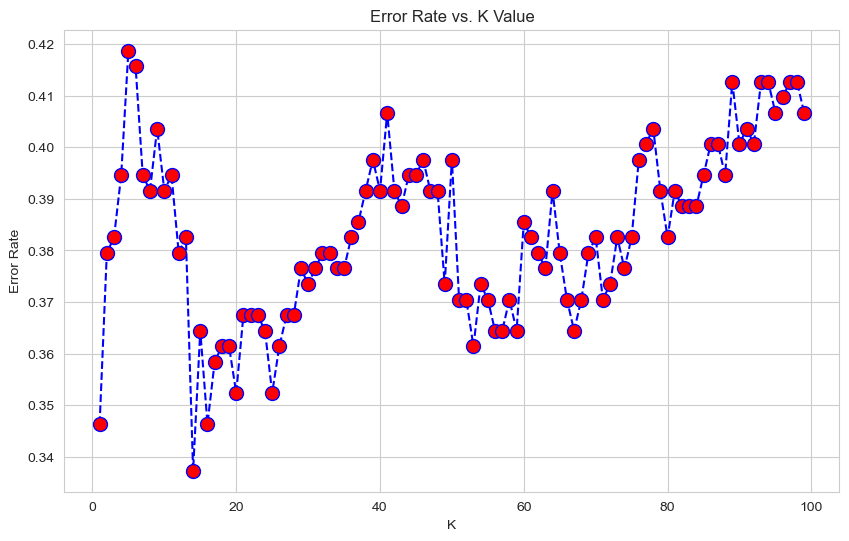

In [354]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Decision Tree


In [346]:
from sklearn.tree import DecisionTreeClassifier

In [347]:
dtree = DecisionTreeClassifier(max_depth=3)

In [309]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

## Prediction and Evaluation 

In [409]:
dree_predictions = dtree.predict(X_test)

In [311]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        high       0.78      0.71      0.74       182
         low       0.68      0.75      0.72       150

    accuracy                           0.73       332
   macro avg       0.73      0.73      0.73       332
weighted avg       0.74      0.73      0.73       332



In [312]:
print(confusion_matrix(y_test,predictions))

[[130  52]
 [ 37 113]]


In [410]:
report_dtree = classification_report(y_test, dree_predictions, output_dict=True)
dtree_report = pd.DataFrame(report_dtree).transpose()
dtree_report

precision    recall  f1-score     support
high           0.778443  0.714286  0.744986  182.000000
low            0.684848  0.753333  0.717460  150.000000
accuracy       0.731928  0.731928  0.731928    0.731928
macro avg      0.731646  0.733810  0.731223  332.000000
weighted avg   0.736156  0.731928  0.732550  332.000000

## Tree Visualization

In [315]:
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz

features = list(df_cleaned.columns[:-1])
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [317]:
df_cleaned.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     low  
2      9.8     low  
3      9.8    high  
4      9.4     low  
5      9.4     low

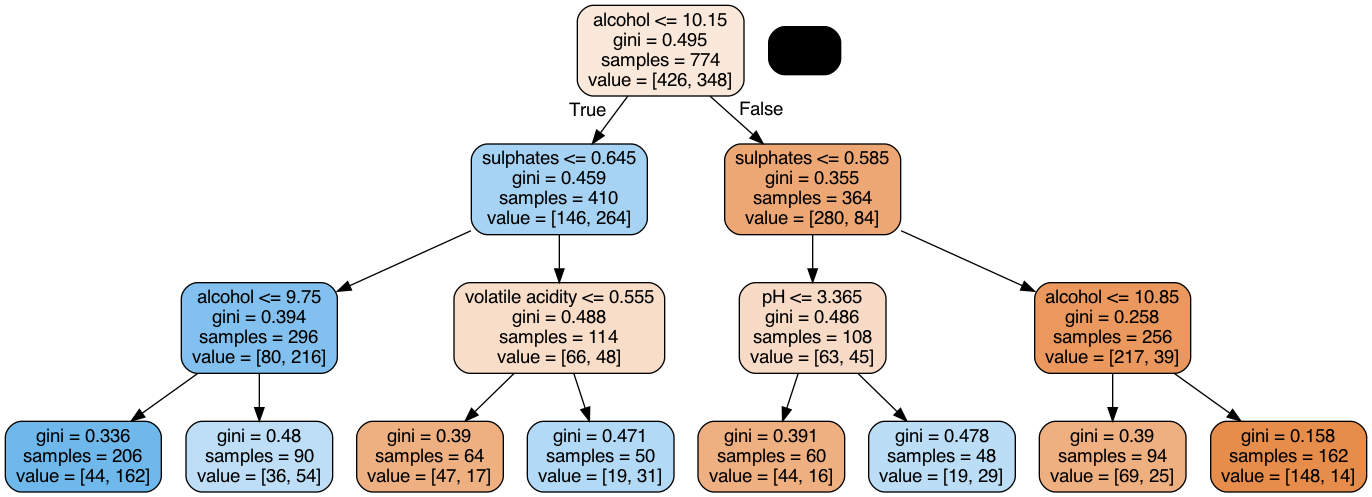

In [318]:
dot_data = tree.export_graphviz(
                    dtree,
                    out_file=None, 
                    feature_names=features,
                    filled=True, 
                    rounded=True
    )

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

## Random Forest

In [319]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)## Random Forests

Now let's compare the decision tree model to a random forest.

RandomForestClassifier()

In [320]:
rfc_pred = rfc.predict(X_test)

## Prediction and Evaluation 

In [321]:
print(confusion_matrix(y_test,rfc_pred))## Prediction and Evaluation 

[[156  26]
 [ 32 118]]


In [344]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

        high       0.83      0.86      0.84       182
         low       0.82      0.79      0.80       150

    accuracy                           0.83       332
   macro avg       0.82      0.82      0.82       332
weighted avg       0.83      0.83      0.82       332



In [406]:
report_rfc = classification_report(y_test, rfc_pred, output_dict=True)
rfc_report = pd.DataFrame(report_rfc).transpose()
rfc_report

precision    recall  f1-score     support
high           0.829787  0.857143  0.843243  182.000000
low            0.819444  0.786667  0.802721  150.000000
accuracy       0.825301  0.825301  0.825301    0.825301
macro avg      0.824616  0.821905  0.822982  332.000000
weighted avg   0.825114  0.825301  0.824935  332.000000

# Support Vector Classifier

In [399]:
from sklearn.svm import SVC

In [400]:
svm = SVC()

In [401]:
svm.fit(X_train,y_train)

SVC()

In [407]:
svm_predictions = svm.predict(X_test)

## Prediction and Evaluation 

In [403]:
print(confusion_matrix(y_test,predictions))

[[161  21]
 [113  37]]


In [404]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        high       0.59      0.88      0.71       182
         low       0.64      0.25      0.36       150

    accuracy                           0.60       332
   macro avg       0.61      0.57      0.53       332
weighted avg       0.61      0.60      0.55       332



In [408]:
report_svc = classification_report(y_test, svm_predictions, output_dict=True)
svc_report = pd.DataFrame(report_svc).transpose()
svc_report

precision    recall  f1-score     support
high           0.587591  0.884615  0.706140  182.000000
low            0.637931  0.246667  0.355769  150.000000
accuracy       0.596386  0.596386  0.596386    0.596386
macro avg      0.612761  0.565641  0.530955  332.000000
weighted avg   0.610335  0.596386  0.547840  332.000000

# GridSearch

In [363]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [364]:
from sklearn.model_selection import GridSearchCV

In [365]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [367]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.555 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.729 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.658 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.684 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.710 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.1s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [371]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [372]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [373]:
grid_predictions = grid.predict(X_test)

## Prediction and Evaluation 

In [374]:
print(confusion_matrix(y_test,grid_predictions))

[[131  51]
 [ 40 110]]


In [376]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

        high       0.77      0.72      0.74       182
         low       0.68      0.73      0.71       150

    accuracy                           0.73       332
   macro avg       0.72      0.73      0.72       332
weighted avg       0.73      0.73      0.73       332



In [449]:
report_grid = classification_report(y_test, grid_predictions, output_dict=True)
grid_report = pd.DataFrame(report_grid).transpose()
grid_report


precision    recall  f1-score     support
high           0.766082  0.719780  0.742210  182.000000
low            0.683230  0.733333  0.707395  150.000000
accuracy       0.725904  0.725904  0.725904    0.725904
macro avg      0.724656  0.726557  0.724803  332.000000
weighted avg   0.728649  0.725904  0.726480  332.000000

# Conclusion

In [388]:
models = [svm, rfc, logmodel, dtree, knn]

results_df = pd.DataFrame(columns=['Model', 'Confusion Matrix', 'Precision', 'Recall', 'F1-Score'])

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions, output_dict=True)
    
    precision = cr['accuracy']
    recall = cr['macro avg']['recall']
    f1_score = cr['macro avg']['f1-score']
    
    temp_df = pd.DataFrame({'Model': [str(model)],
                            'Confusion Matrix': [cm],
                            'Precision': [precision],
                            'Recall': [recall],
                            'F1-Score': [f1_score]})
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

print(results_df)

                                  Model        Confusion Matrix  Precision  \
0                                 SVC()  [[161, 21], [113, 37]]   0.596386   
1              RandomForestClassifier()  [[155, 27], [34, 116]]   0.816265   
2                  LogisticRegression()  [[135, 47], [46, 104]]   0.719880   
3   DecisionTreeClassifier(max_depth=3)  [[130, 52], [37, 113]]   0.731928   
4  KNeighborsClassifier(n_neighbors=99)  [[155, 27], [108, 42]]   0.593373   

     Recall  F1-Score  
0  0.565641  0.530955  
1  0.812491  0.813694  
2  0.717546  0.717416  
3  0.733810  0.731223  
4  0.565824  0.540095  


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

In [454]:
print('\033[1m' + "Classification reports" + '\033[0m')
print('\033[1m' + "Grid Search" + '\033[0m')
print(grid_report)
print('\033[1m' + "Support Vector Classifier" + '\033[0m')
print(svc_report)
print('\033[1m' + "Random Forest" + '\033[0m')
print(rfc_report)
print('\033[1m' + "Decision Tree" + '\033[0m')
print(dtree_report)
print('\033[1m' + "K nearest neightbors" + '\033[0m')
print(knn_report)
print('\033[1m' + "Logistic Regression" + '\033[0m')
print(log_report)

Classification reports
Grid Search
              precision    recall  f1-score     support
high           0.766082  0.719780  0.742210  182.000000
low            0.683230  0.733333  0.707395  150.000000
accuracy       0.725904  0.725904  0.725904    0.725904
macro avg      0.724656  0.726557  0.724803  332.000000
weighted avg   0.728649  0.725904  0.726480  332.000000
Support Vector Classifier
              precision    recall  f1-score     support Model
high           0.587591  0.884615  0.706140  182.000000   SVC
low            0.637931  0.246667  0.355769  150.000000   SVC
accuracy       0.596386  0.596386  0.596386    0.596386   SVC
macro avg      0.612761  0.565641  0.530955  332.000000   SVC
weighted avg   0.610335  0.596386  0.547840  332.000000   SVC
Random Forest
              precision    recall  f1-score     support          Model
high           0.829787  0.857143  0.843243  182.000000  Random Forest
low            0.819444  0.786667  0.802721  150.000000  Random Forest
accu